
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [9]:

import numpy as np
import matplotlib.pyplot as plt


In [10]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [11]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr                # Learning Rate
        self.epochs = epochs        # Number of iterations
        self.l2_lambda = l2_lambda  # Regularization strength

    def fit(self, X, y):
        n, d = X.shape
        self.weights = np.zeros(d)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.epochs):
            y_pred = X @ self.weights + self.bias
            error = y_pred - y

            dw = (1/n) * (X.T @ error) + self.l2_lambda * self.weights
            db = (1/n) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            mse = np.mean(error ** 2) / 2
            l2_term = (self.l2_lambda / 2) * np.sum(self.weights ** 2)
            loss = mse + l2_term
            self.loss_history.append(loss)

    def predict(self, X):
        return X @ self.weights + self.bias


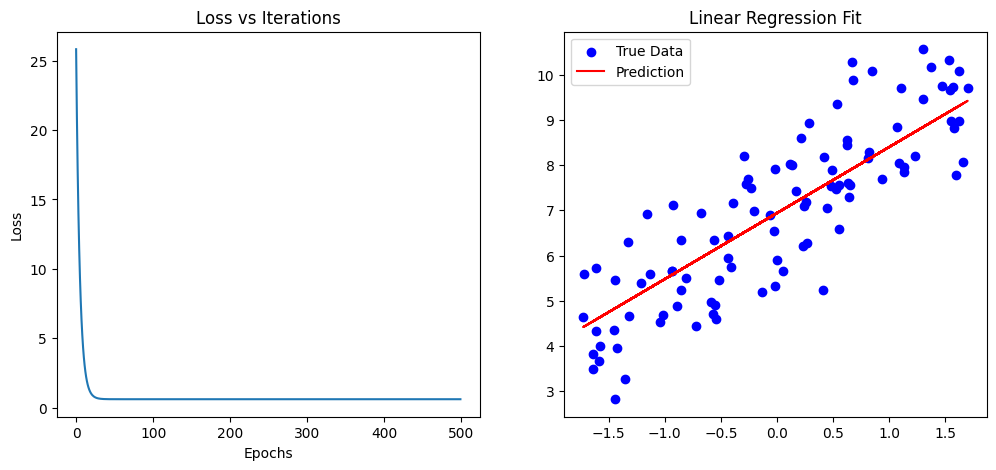

In [12]:
# Testing Model
X_raw = 2 * np.random.rand(100, 1)
y_raw = 4 + 3 * X_raw.flatten() + np.random.randn(100) # y = 4 + 3x + noise

# 1. Standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_raw)

# 2. Train Model
lr_reg = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.1)
lr_reg.fit(X_scaled, y_raw)

# 3. Plot Results
plt.figure(figsize=(12, 5))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(lr_reg.loss_history)
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Prediction
plt.subplot(1, 2, 2)
plt.scatter(X_scaled, y_raw, color='blue', label='True Data')
plt.plot(X_scaled, lr_reg.predict(X_scaled), color='red', label='Prediction')
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [13]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [14]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.loss_history = []

    def fit(self, X, y):
        n, d = X.shape
        self.weights = np.zeros(d)
        self.bias = 0

        for i in range(self.epochs):
            z = X @ self.weights + self.bias
            y_pred = sigmoid(z)

            dw = (1/n) * X.T @ (y_pred - y)
            db = (1/n) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        probs = sigmoid(X @ self.weights + self.bias)
        return (probs >= 0.5).astype(int)


Final Accuracy: 100.00%


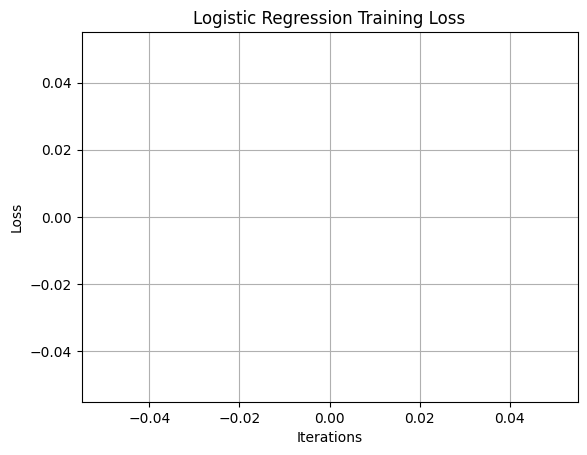

In [15]:
# Testing Model
np.random.seed(42)
X_class0 = np.random.randn(50, 2) + 2
X_class1 = np.random.randn(50, 2) + 6

X = np.vstack((X_class0, X_class1))
y = np.hstack((np.zeros(50), np.ones(50))) # Labels 0 and 1

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model.fit(X_scaled, y)

# Result
predictions = model.predict(X_scaled)
accuracy = np.mean(predictions == y)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

# Plot Training Loss Curve
plt.plot(model.loss_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [16]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    flat_M = M.reshape(-1, 1) # Reshape
    # Apply KMeans using sklearn
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(flat_M)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten()

    rows, cols = M.shape
    assignment_table = labels.reshape(rows, cols)
    cookbook = {i: [] for i in range(k)}

    for rows in range(rows):
        for cols in range(cols):
            cluster_id = assignment_table[rows, cols]
            cookbook[cluster_id].append((rows, cols))
            
    return assignment_table, cookbook, centroids

M = np.random.randint(0, 255, size=(10, 10)) 

table, cookbook, centroids = kmeans_matrix(M, k=3)

print("Centroids (Cluster Centers):", centroids)
print("\nSample from Assignment Table (Top 5 rows):")
print(table[:5])
print(f"\nCoordinates for Cluster 0 (First 5): {cookbook[0][:5]}")
print(f"\nNumber of items in Cluster 0: {len(cookbook[0])}")


Centroids (Cluster Centers): [ 39.94444444 120.40540541 206.11111111]

Sample from Assignment Table (Top 5 rows):
[[1 2 0 1 1 1 0 2 2 0]
 [2 2 2 0 1 0 1 1 0 0]
 [2 1 0 0 2 0 0 0 2 1]
 [1 2 1 2 1 1 1 0 0 2]
 [2 1 0 1 2 0 2 1 1 0]]

Coordinates for Cluster 0 (First 5): [(0, 2), (0, 6), (0, 9), (1, 3), (1, 5)]

Number of items in Cluster 0: 20



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
